Požadované výsledky:
1. Graf závislosti maximální výstupní energie Emax na odrazivosti výstupního zrcadla ROC. 

    Pro všechna testovaná zrcadla graf a tabulka závislosti výstupní energie E a účinnosti η = E/Eb na budící energii Eb. 

    Pro optimální výstupní zrcadlo graf a tabulka závislosti délky impulsu τFR, a středního výkonu Pstr = E/τFR na budící energii Eb.
    
    Doplňte obrázky časových průběhů záření a hustotu energie při maximální energii Wmax = Emax/S (v J/cm2).
2. Graf závislosti zesílení impulsu G na budící energii laserového oscilátoru pro optimální výstupní zrcadlo.
3. Výsledky měření délky τQ, energie EQ, špičkového výkonu PQ (vše s odchylkou), plošné hustoty energie WQ
Q-spínaných impulsů a záznam časového vývoje (z osciloskopu) Q-spínaného impulsu. Porovnejte plošnou
hustotu energie impulsu v režimu Q-spínání a v režimu volné generace.

In [73]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import matplotlib.pyplot as plt # vykreslovani grafu
import math


In [74]:
prevodni_tabulka = pd.read_excel("data_01.xlsx", sheet_name="prevodni_tabulka", engine="openpyxl", usecols="A, B", index_col=0)
zrcadlo_M337 = pd.read_excel("data_01.xlsx", sheet_name="volne", engine="openpyxl", skiprows=1, usecols="A, B", nrows=12)
kremenne_sklo = pd.read_excel("data_01.xlsx", sheet_name="volne", engine="openpyxl", skiprows=1, usecols="C, D", nrows=12)
zrcadlo_M327 = pd.read_excel("data_01.xlsx", sheet_name="volne", engine="openpyxl", skiprows=1, usecols="E, F", nrows=12)
zesilovac = pd.read_excel("data_01.xlsx", sheet_name="zesilovac", engine="openpyxl", skiprows=1, usecols="A, B", nrows=12)
q_spinani = pd.read_excel("data_01.xlsx", sheet_name="q-spinani", engine="openpyxl", usecols="A, B", nrows=11)
prevodni_tabulka = prevodni_tabulka.to_dict(orient="dict")["U [V]"]


In [75]:
def prevod_na_V_J(prevodni_tabulka:dict, data:pd.DataFrame, k_prevedeni:str, detektor:str)->pd.DataFrame:
    r_opticky_klin = 0.04 # 
    t_matnice_D2 = 0.62 #
    c = 100*10**(-6) # F

    return pd.DataFrame.from_dict({
    "U_b [V]":[prevodni_tabulka[d] for d in data[k_prevedeni]], 
    "E_b [J]":[prevodni_tabulka[d]**2 * c for d in data[k_prevedeni]],
    "D2 [V]": list(data[detektor]/(r_opticky_klin * t_matnice_D2*1000)), 
    "D2 [J]": list(data[detektor]/(r_opticky_klin * t_matnice_D2*1000*15.8))}) #prevodni vztah pro pyroelektrickou sondu


def rms(namerena_data, prumer=None):
    """Root mean square (stredni kvadraticka chyba)

    Args:
        namerena_data (list / pandas.DataFrame, numpy.NDArray / jakykoli seznam hodnot): seznam namerenych hodnot
        prumer (float, nepovinny argument): prumer z namerenych hodnot. Nepovinny ragument, funkce si jej umi spocitat sama.

    Returns:
        float: stredni kvadraticka chyba
    """
    if not prumer:
        prumer = np.mean(namerena_data)
    return prumer, np.sqrt(np.square(np.subtract(namerena_data,prumer)).mean())


In [76]:
zrcadlo_M337_prevedene = prevod_na_V_J(prevodni_tabulka, zrcadlo_M337, "zdroj [dilky]", "D2 [mV]")
kremenne_sklo_prevedene = prevod_na_V_J(prevodni_tabulka, kremenne_sklo, "zdroj [dilky].1", "D2 [mV].1")
zrcadlo_M327_prevedene = prevod_na_V_J(prevodni_tabulka, zrcadlo_M327, "zdroj [dilky].2", "D2 [mV].2")

1. Graf závislosti maximální výstupní energie Emax na odrazivosti výstupního zrcadla ROC. 

<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_5639/2943206381.py:17: SyntaxWarning: invalid escape sequence '\%'
  plt.xlabel('$R~\\mathrm{[\%]}$ ', fontsize = 10)


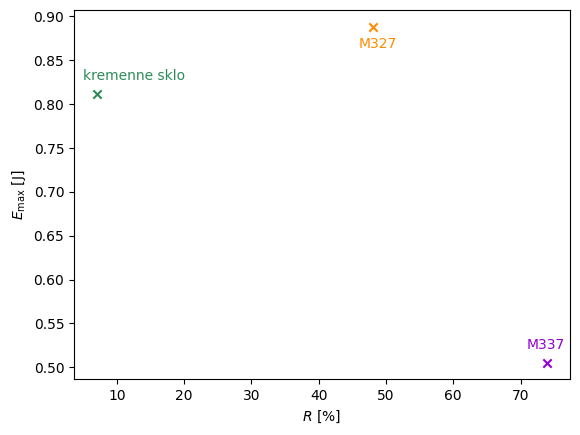

In [77]:
r_zrcadel = {"M337":74, "kremenne sklo":7, "M327":48} # %
E_max = {"M337":np.max(zrcadlo_M337_prevedene["D2 [J]"]), 
         "kremenne sklo":np.max(kremenne_sklo_prevedene["D2 [J]"]), 
         "M327":np.max(zrcadlo_M327_prevedene["D2 [J]"])}
colors = ["darkviolet", "seagreen", "darkorange"]
xytext=[(-15, 10), (-10, 10), (-10, -15)]
fig_odrazivost = plt.figure()
for n,key in enumerate(r_zrcadel.keys()):
    plt.scatter(x=r_zrcadel[key], y=E_max[key], 
                color=colors[n],
                marker="x")
    plt.annotate(text = key, xy=(r_zrcadel[key],E_max[key]), 
            color=colors[n],
            textcoords="offset points", # how to position the text
            xytext=xytext[n]) # distance from text to points (x,y)
            #ha='center') # horizontal alignment can be left, right or center)
plt.xlabel('$R~\\mathrm{[\%]}$ ', fontsize = 10)
plt.ylabel("$E_\\mathrm{{max}}~\\mathrm{[J]}$", fontsize = 10)
plt.savefig("../protokol_01/img/odrazivost.pdf")
    

Pro všechna testovaná zrcadla graf a tabulka závislosti výstupní energie E a účinnosti η = E/Eb na budící energii Eb. 

<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:26: SyntaxWarning: invalid escape sequence '\%'
<>:38: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:26: SyntaxWarning: invalid escape sequence '\%'
<>:38: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_5639/1986165893.py:14: SyntaxWarning: invalid escape sequence '\%'
  ax[1].set_ylabel("$\\eta~\\mathrm{[\%]}$")
/tmp/ipykernel_5639/1986165893.py:26: SyntaxWarning: invalid escape sequence '\%'
  ax[1].set_ylabel("$\\eta~\\mathrm{[\%]}$")
/tmp/ipykernel_5639/1986165893.py:38: SyntaxWarning: invalid escape sequence '\%'
  ax[1].set_ylabel("$\\eta~\\mathrm{[\%]}$")


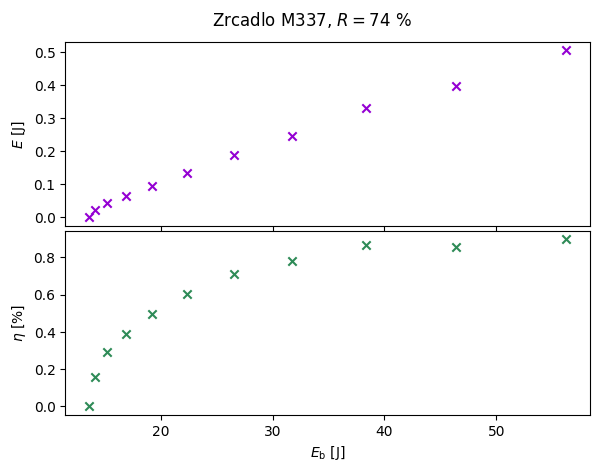

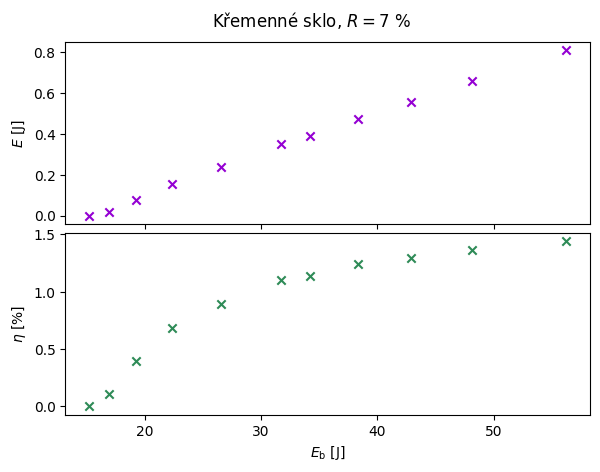

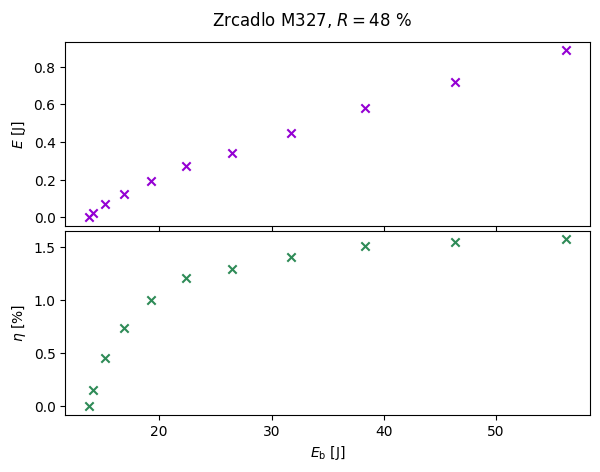

In [78]:
ucinnost_M337 = zrcadlo_M337_prevedene["D2 [J]"]/zrcadlo_M337_prevedene["E_b [J]"] * 100
ucinnost_kremenne_sklo = kremenne_sklo_prevedene["D2 [J]"]/kremenne_sklo_prevedene["E_b [J]"] * 100
ucinnost_M327 = zrcadlo_M327_prevedene["D2 [J]"]/zrcadlo_M327_prevedene["E_b [J]"] * 100

fig_M337, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(zrcadlo_M337_prevedene["E_b [J]"], zrcadlo_M337_prevedene["D2 [J]"], 
              color="darkviolet", marker="x")
ax[1].scatter(zrcadlo_M337_prevedene["E_b [J]"], ucinnost_M337,
              color="seagreen", marker="x")
plt.tight_layout(pad=3, h_pad=0)
plt.suptitle("Zrcadlo M337, $R=74~\\%$")
ax[1].set_xlabel("$E_\\mathrm{{b}}~\\mathrm{[J]}$")
ax[0].set_ylabel("$E~\\mathrm{[J]}$")
ax[1].set_ylabel("$\\eta~\\mathrm{[\%]}$")
plt.savefig("../protokol_01/img/zrcadlo_M337.pdf")

fig_kremenne_sklo, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(kremenne_sklo_prevedene["E_b [J]"], kremenne_sklo_prevedene["D2 [J]"], 
              color="darkviolet", marker="x")
ax[1].scatter(kremenne_sklo_prevedene["E_b [J]"], ucinnost_kremenne_sklo,
              color="seagreen", marker="x")
plt.tight_layout(pad=3, h_pad=0)
plt.suptitle("Křemenné sklo, $R=7~\\%$")
ax[1].set_xlabel("$E_\\mathrm{{b}}~\\mathrm{[J]}$")
ax[0].set_ylabel("$E~\\mathrm{[J]}$")
ax[1].set_ylabel("$\\eta~\\mathrm{[\%]}$")
plt.savefig("../protokol_01/img/zrcadlo_kremenne_sklo.pdf")

fig_M327, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(zrcadlo_M327_prevedene["E_b [J]"], zrcadlo_M327_prevedene["D2 [J]"], 
              color="darkviolet", marker="x")
ax[1].scatter(zrcadlo_M327_prevedene["E_b [J]"], ucinnost_M327,
              color="seagreen", marker="x")
plt.tight_layout(pad=3, h_pad=0)
plt.suptitle("Zrcadlo M327, $R=48~\\%$")
ax[1].set_xlabel("$E_\\mathrm{{b}}~\\mathrm{[J]}$")
ax[0].set_ylabel("$E~\\mathrm{[J]}$")
ax[1].set_ylabel("$\\eta~\\mathrm{[\%]}$")
plt.savefig("../protokol_01/img/zrcadlo_M327.pdf")

zrcadla_ucinnost = {
    "zrcadlo M337":pd.DataFrame.from_dict({"E_b [J]": list(zrcadlo_M337_prevedene["E_b [J]"]), 
                    "E [J]": list(zrcadlo_M337_prevedene["D2 [J]"]), 
                    "eta [%]": list(ucinnost_M337)}),
    "kremenne sklo":pd.DataFrame.from_dict({"E_b [J]": list(kremenne_sklo_prevedene["E_b [J]"]), 
                    "E [J]": list(kremenne_sklo_prevedene["D2 [J]"]), 
                    "eta [%]": list(ucinnost_kremenne_sklo)}),   
    "zrcadlo M327":pd.DataFrame.from_dict({"E_b [J]": list(zrcadlo_M327_prevedene["E_b [J]"]), 
                    "E [J]": list(zrcadlo_M327_prevedene["D2 [J]"]), 
                    "eta [%]": list(ucinnost_M327)})     
}

with open("tabulka_M337.txt", "w") as file:
    file.write(zrcadla_ucinnost["zrcadlo M337"].to_latex(index=False).replace(".", ","))
with open("tabulka_kremenne_sklo.txt", "w") as file:
    file.write(zrcadla_ucinnost["kremenne sklo"].to_latex(index=False).replace(".", ","))
with open("tabulka_M237.txt", "w") as file:
    file.write(zrcadla_ucinnost["zrcadlo M327"].to_latex(index=False).replace(".", ","))




Pro optimální výstupní zrcadlo graf a tabulka závislosti délky impulsu τFR, a středního výkonu Pstr = E/τFR na budící energii Eb.



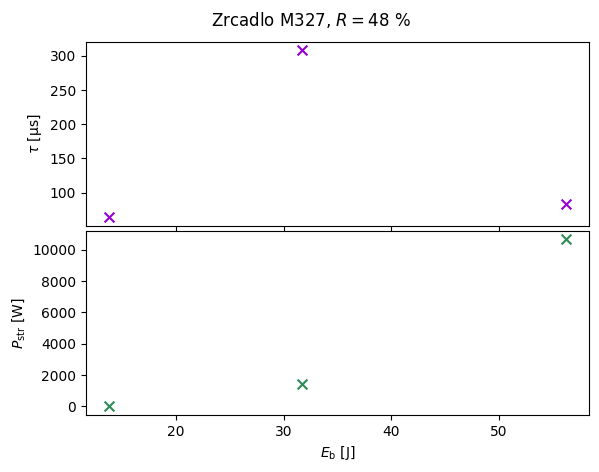

In [79]:
optimalni_zrcadlo = pd.DataFrame.from_dict({
    "dilky": [220, 550, 700],
    "D2 [mV]": [0, 175, 348]
})
optimalni_zrcadlo_prevedene = prevod_na_V_J(prevodni_tabulka, optimalni_zrcadlo, "dilky", "D2 [mV]")

t = np.array([63.6, 308, 83.2])# \mu s
P_str = optimalni_zrcadlo_prevedene["D2 [J]"]/(t*10**(-6))


fig_optimalni_zrcadlo, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(optimalni_zrcadlo_prevedene["E_b [J]"], t, 
              color="darkviolet", marker="x", s=50)
ax[1].scatter(optimalni_zrcadlo_prevedene["E_b [J]"], P_str,
              color="seagreen", marker="x", s=50)
plt.tight_layout(pad=3, h_pad=0)
plt.suptitle("Zrcadlo M327, $R=48~\\%$")
ax[1].set_xlabel("$E_\\mathrm{{b}}~\\mathrm{[J]}$")
ax[0].set_ylabel("$\\tau~\\mathrm{[\\mu s]}$")
ax[1].set_ylabel("$P_\\mathrm{{str}}~\\mathrm{[W]}$")
plt.savefig("../protokol_01/img/optimalni_zrcadlo.pdf")


Doplňte obrázky časových průběhů záření a hustotu energie při maximální energii Wmax = Emax/S (v J/cm2).


In [80]:
d_svazku = 3.6*10**(-1) # cm
S = math.pi * (d_svazku/2)**2

E_max_M327 = np.max(optimalni_zrcadlo_prevedene["D2 [J]"])
W_max=E_max_M327/S
print(W_max)


8.725204069811117


2. Graf závislosti zesílení impulsu G na budící energii laserového oscilátoru pro optimální výstupní zrcadlo.


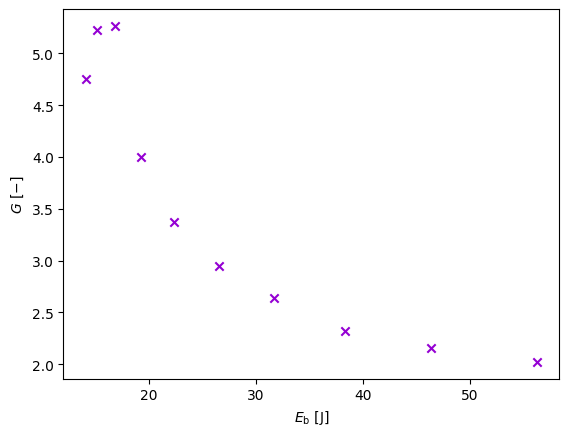

In [81]:
zesilovac_prevedene = prevod_na_V_J(prevodni_tabulka, zesilovac, "zdroj [dilky]", "D2 [mV]")
zesileni = zesilovac_prevedene["D2 [J]"]/zrcadlo_M327_prevedene["D2 [J]"]
fig_zesileni = plt.figure()
plt.scatter(zesilovac_prevedene["E_b [J]"], zesileni,
            color="darkviolet", marker="x")
plt.xlabel("$E_\\mathrm{{b}}~\\mathrm{[J]}$")
plt.ylabel("$G~\\mathrm{[-]}$")
plt.savefig("../protokol_01/img/zesileni.pdf")

3. Výsledky měření délky τQ, energie EQ, špičkového výkonu PQ (vše s odchylkou), plošné hustoty energie WQ
Q-spínaných impulsů a záznam časového vývoje (z osciloskopu) Q-spínaného impulsu. Porovnejte plošnou
hustotu energie impulsu v režimu Q-spínání a v režimu volné generace.

In [ ]:
r_opticky_klin = 0.04 # 
t_matnice_D2 = 0.62 #
d_q = 2.9 /10 # cm
S_q = math.pi * (d_q/2)**2 # cm2

delka_pulsu_q = np.array(q_spinani["Delka_pulsu [ns]"])
energie_q = np.array(q_spinani["D2 [mV]"]/(r_opticky_klin * t_matnice_D2*15.8))
spickovy_vykon_q = (energie_q/1000)/(delka_pulsu_q*10**(-9))
plosna_hustota_q = energie_q/S_q



q_spinani_vysledky = pd.DataFrame.from_dict({
    "t [ns]":delka_pulsu_q,
    "E [mJ]": energie_q,
    "P [kW]": spickovy_vykon_q/1000,
    "W [J cm^{{-2}}]": plosna_hustota_q
})


odchylky = pd.DataFrame.from_dict({
    "t [ns]":rms(namerena_data=delka_pulsu_q),
    "E [mJ]": rms(namerena_data=energie_q),
    "P [kW]": rms(namerena_data=spickovy_vykon_q),
    "W [J cm^{{-2}}]": rms(namerena_data=plosna_hustota_q)
})


with open("q_spinani_vysledky.txt", "w") as file:
    file.write(q_spinani_vysledky.to_latex(index=False).replace(".", ","))

    file.write(odchylky.to_latex(index=False).replace(".", ","))
    

AttributeError: 'DataFrame' object has no attribute 'relabel_index'